## 机器学习预测乳腺肿瘤性质
(1)
先加载需要的module和数据，数据是csv的格式，利用pandas的read_csv函数把数据加载进来

In [57]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
data=pd.read_csv('E://learnFile/ru/data.csv')

## 大致看看数据的情况

In [58]:
#data.info()
#data.describe()
data.shape
data.dtypes
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 把label也就是人工诊断的结果diagnosis和feature分别提取出来，方便后续数据操作

In [59]:
'''
m表示恶性肿瘤
b表示良性肿瘤

'''
diagnosis=data.diagnosis

In [63]:
diagnosis.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [108]:
'''
提取特征对应的数据

'''
pred_features=data.iloc[:,2:32]

In [109]:
pred_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 利用五折交叉验证法，测试不同的分类算法在该数据集上的表现，本次我们只使用预测的准确率来作为评判标准。

In [110]:
'''
导入相关的模型库

'''
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression  #逻辑回归分类器
from sklearn.linear_model import SGDClassifier   #随机梯度下降分类器
from sklearn.svm import SVC  #支持向量机分类器
from sklearn.ensemble import RandomForestClassifier  #随机森林

In [112]:
'''
 StratifiedKFold能够把数据集按照良恶性一定比例分成五份
 做五折交叉验证，四份作为训练集，一份作为测试集
 把三种分类算法在测试集上评估预测的准确率

'''

sfk=StratifiedKFold(y=diagnosis,n_folds=5,random_state=42,shuffle=True)

'''
接下来建立三个模型

'''
lr=LogisticRegression(random_state=42)
SGD=SGDClassifier()
svm=SVC(kernel='linear',C=1,random_state=42)
RFC=RandomForestClassifier()

## 逻辑回归模型交叉验证

In [113]:
i=0
for a,b in sfk:
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    lr.fit(train_x,train_y)
    accuracy=lr.score(test_x,test_y)
    i=i+1
    print("第%d次交叉验证准确率：%.5f" %(i,accuracy))

第1次交叉验证准确率：0.92174
第2次交叉验证准确率：0.93913
第3次交叉验证准确率：0.96460
第4次交叉验证准确率：0.97345
第5次交叉验证准确率：0.93805


## 随机梯度下降分类器的交叉验证

In [114]:
i=0
for a,b in sfk:
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    SGD.fit(train_x,train_y)
    accuracy=SGD.score(test_x,test_y)
    i=i+1
    print("第%d次交叉验证准确率：%.5f" % (i,accuracy))

第1次交叉验证准确率：0.79130
第2次交叉验证准确率：0.91304
第3次交叉验证准确率：0.79646
第4次交叉验证准确率：0.92920
第5次交叉验证准确率：0.51327


## 支持向量机模型的交叉验证

In [115]:
i=0
for a,b in sfk:
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    svm.fit(train_x,train_y)
    accuracy=svm.score(test_x,test_y)
    i=i+1
    print("第%d次交叉验证准确率：%.5f" % (i,accuracy))

第1次交叉验证准确率：0.93043
第2次交叉验证准确率：0.95652
第3次交叉验证准确率：0.98230
第4次交叉验证准确率：0.98230
第5次交叉验证准确率：0.92035


In [116]:
i=0
for a,b in sfk:
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    RFC.fit(train_x,train_y)
    accuracy=RFC.score(test_x,test_y)
    print("第%d次交叉验证准确率：%.5f" % (i,accuracy))

第0次交叉验证准确率：0.93913
第0次交叉验证准确率：0.93913
第0次交叉验证准确率：0.97345
第0次交叉验证准确率：0.95575
第0次交叉验证准确率：0.96460


## 为实现代码的重复使用并更加concise，我们可以构建一个类，将上面的过程包装起来使用

In [118]:
class winsconBC:
    def __init__(self,data_y,method,rand_seed=42,Nfolds=3,shuffled=True):
        from sklearn.cross_validation import StratifiedKFold
        self.data=data_y
        self.clf=method
        self.Rseed=rand_seed
        self.Nfolds=Nfolds
        self.shuffle=shuffled
        self.classifier=method
        self.sfk=StratifiedKFold(y=self.data,n_folds=self.Nfolds,random_state=self.Rseed,shuffle=self.shuffle)
    def classify(self):
        accuracy=list()
        for tr,ts in self.sfk:
            train_x,train_y=pred_features.iloc[tr,:],diagnosis[tr]
            test_x,test_y=pred_features.iloc[ts,:],diagnosis[ts]
        if(self.classifier=='logistic'):
            from sklearn.linear_model import LogisticRegression
            lr=LogisticRegression(random_state=self.Rseed)
            lr.fit(train_x,train_y)
            accuracy.append(lr.score(test_x,test_y))
        if(self.classifier=='SGD'):
            from sklearn.linear_model import SGDClassifier
            SGD=SGDClassifier(random_state=self.Rseed)
            SGD.fit(train_x,train_y)
            accuracy.append(SGD.score(test_x,test_y))
        if(self.classifier=='SVM'):
            from sklearn.svm import SVC
            svm=SVC(kernel='linear',C=1,random_state=self.Rseed)
            svm.fit(train_x,train_y)
            accuracy.append(svm.score(test_x,test_y))
        if(self.classifier=='randomforest'):
            from sklearn.ensemble import RandomForestClassifier
            rm=RandomForestClassifier()
            rm.fit(train_x,train_y)
            accuracy.append(rm.score(test_x,test_y))
        return np.array(accuracy)

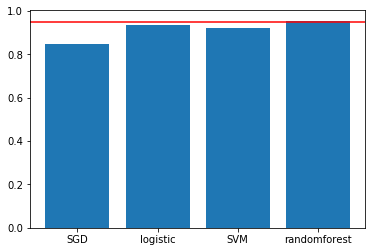

In [119]:
plt.figure()
plt.bar(np.arange(4),np.array([np.mean(winsconBC(data_y=diagnosis,method=i,Nfolds=5).classify()) for i in ["SGD",'logistic','SVM',"randomforest"]]))
plt.xticks(np.arange(4),("SGD",'logistic','SVM',"randomforest"))
plt.axhline(0.95,c="r") ## 加一条accuracy=0.95的基准曲线做参考
plt.show()

## 设置模型的参数

    http://blog.sina.com.cn/s/blog_7103b28a0102w08u.html
    sklearn-SGD
    随机梯度下降算法
    1.1 概述
        注意：在进行分类前确保训练数据进行过序列置换操作（permute,shuffle），或者在生成模型时使用shuffle=True参数设置，使得每次迭代后数据进行过序列置换。这个的意思就是样本数据在完成每次迭代后，其顺序被重新排列。
    GDClassifier类支持以不同损失函数进行随机梯度下降进行分类，大致使用过程如下：    

In [120]:
from sklearn.linear_model import SGDClassifier
X=[[0.,0.],[1.,1.]]
y=[0,1]
clf=SGDClassifier(loss='hinge',penalty="l2")
clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [121]:
clf.predict([[2.,2.]])

array([1])

    关于损失函数，可以通过参数loss设置。可选的损失函数包括：

    ·        loss="hinge": (soft-margin) linear Support Vector Machine,

    ·        loss="modified_huber": smoothed hinge loss,

    ·        loss="log": logistic regression,

    ·        loss="squared_loss": Ordinary least squares,

    ·        loss="huber": Huber loss for robust regression,

    ·        loss="epsilon_insensitive": linear Support Vector Regression.

    关于惩罚项，可以通过penalty参数设置，可选的包括：

    ·        penalty="l2": L2 norm penalty on coef_.

    ·        penalty="l1": L1 norm penalty on coef_.

    ·        penalty="elasticnet": Convex combination of L2 and L1;(1 - l1_ratio) * L2 + l1_ratio * L1.

In [122]:
#加载相关module和数据
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
data=pd.read_csv('E://learnFile/ru/data.csv')
diagonsis=data.diagnosis
predi_features=data.iloc[:,2:32]

In [123]:
class winsconBC:
    def __init__(self,data_y,method,rand_seed=42,Nfolds=3,shuffled=True):
        from sklearn.cross_validation import StratifiedKFold
        self.data=data_y
        self.clf=method
        self.Rseed=rand_seed
        self.Nfolds=Nfolds
        self.shuffle=shuffled
        self.classifier=method
        self.sfk=StratifiedKFold(y=self.data,n_folds=self.Nfolds,random_state=self.Rseed,shuffle=self.shuffle)
    def classify(self):
        accuracy=list()
        for tr,ts in self.sfk:
            train_x,train_y=predi_features.iloc[tr,:],diagnosis[tr]
            test_x,test_y=predi_features.iloc[ts,:],diagnosis[ts]
            
        if(self.classifier=='logistic'):
            from sklearn.linear_model import LogisticRegression
            lr=LogisticRegression(random_state=self.Rseed)
            lr.fit(train_x,train_y)
            accuracy.append(lr.score(test_x,test_y))
        if(self.classifier=='SGD'):
            from sklearn.linear_model import SGDClassifier
            SGDclf=SGDClassifier(loss="log",n_iter=1000,learning_rate="optimal")  ### 手动设置参数，详见sklearn官网
            SGD.fit(train_x,train_y)
            accuracy.append(SGD.score(test_x,test_y))
        if(self.classifier=='SVM'):
            from sklearn.svm import SVC
            svmClf=SVC(kernel="linear",C=1)  ### 这里设置kernal=linear,不再是默认的rbf
            svm.fit(train_x,train_y)
            accuracy.append(svm.score(test_x,test_y))
        if(self.classifier=='randomforest'):
            from sklearn.ensemble import RandomForestClassifier
            rm=RandomForestClassifier()
            rm.fit(train_x,train_y)
            accuracy.append(rm.score(test_x,test_y))
        return(np.array(accuracy))    

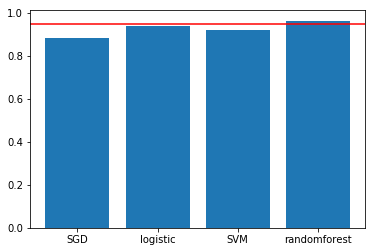

In [124]:
plt.figure()
plt.bar(np.arange(4),np.array([np.mean(winsconBC(data_y=diagnosis,method=i,Nfolds=5).classify()) for i in ["SGD",'logistic','SVM',"randomforest"]]))
plt.xticks(np.arange(4),("SGD",'logistic','SVM',"randomforest"))
plt.axhline(0.95,c="r") ## 加一条accuracy=0.95的基准曲线做参考
plt.show()

## 构造朴素贝叶斯分类器

## 贝叶斯方法的提出

提出者：托马斯·贝叶斯

    贝叶斯方法思考问题的模式：先验分布P (A) + 样本信息B =后验分布(P(A|B))， 这种思考模式意味着，新观察到的样本信息将修正人们以前对事物的认知。换言之，在得到新的样本信息之前，人们对A的认知是先验分布P(A) ，在得到新的样本信息后，人们对A的认知为P(A|B) 。

    通俗理解就好比是人类刚开始时对大自然只有少得可怜的先验知识，但随着不断是观察、实验获得更多的样本、结果，使得人们对自然界的规律摸得越来越透彻。所以，贝叶斯方法既符合人们日常生活的思考方式，也符合人们认识自然的规律。

## 有关的定义

    条件概率（又称后验概率）指利用贝叶斯公式，结合调查等方式获取了新的附加信息，对先验概率进行修正得到的更符合实际的概率。就是事件A在另外一个事件B已经发生条件下的发生概率。条件概率表示为P(A|B)，读作“在B条件下A的概率”， P(A|B) =P(AB)/P(B)。

    联合概率也叫乘法公式，是指两个任意事件的乘积的概率，或称之为交事件的概率。A与B的联合概率表示为P(AB)。

    先验概率是指根据历史的资料或主观判断所确定的各事件发生的概率。该类概率没能经过试验证实，属于检验前的概率，所以称之为先验概率。先验概率一般分为两类，一是客观先验概率，是指利用过去的历史资料计算得到的概率；二是主观先验概率，是指在无历史资料或历史资料不全的时候，只能凭借人们的主观经验来判断取得的概率。

## 接着，考虑一个问题：P(A|B)是在B发生的情况下A发生的可能性。

    首先，事件B发生之前，我们对事件A的发生有一个基本的概率判断，称为A的先验概率，用P(A)表示；
        其次，事件B发生之后，我们对事件A的发生概率重新评估，称为A的后验概率，用P(A|B)表示；
        类似的，事件A发生之前，我们对事件B的发生有一个基本的概率判断，称为B的先验概率，用P(B)表示；
        同样，事件A发生之后，我们对事件B的发生概率重新评估，称为B的后验概率，用P(B|A)表示。

## 公式P(B|A)=P(A|B)*P(B)/P(A)
    这个定理解决了现实生活里面经常遇到的问题：已知某条件概率，如何得到两个事件交换后的概率，也就是 已知P(A|B)的情况下如何求得P(B|A)的概率。
    朴素贝叶斯分类有一个限制条件，就是特征属性必须有条件独立或基本独立

In [20]:
from sklearn.naive_bayes import GaussianNB
nbClf=GaussianNB()
from sklearn.model_selection import cross_val_score
cross_val_score(nbClf,pred_features,diagnosis,cv=5,scoring='accuracy')

array([ 0.92173913,  0.92173913,  0.95575221,  0.94690265,  0.95575221])

## 多层感知机    也就是全连接神经网络
    神经网络的机制：把输入层的特征变量先乘以权重后求和加上一个偏置项，通过一个activation function 进行非线性转换，将这些非线性变换的结果再次作为输入层，以同样的方法再次进入下一个隐藏层，直到最后的输出层，该过程称为前向传播（forward propagation），再利用后向传播算法（back propagation）和梯度下降更新权重，不断最小化损失函数，直至得到最优解（或者局部最优解）。

    神经网络结构的隐藏层部分可以自由搭建，就像乐高积木一样可以一层一层拼接起来，隐藏层可以10层，可以20层，甚至上百层上千层，只要算力足够，现在深度学习的发展趋势是网络层数越来越多，所以得名Deep Learning。每一个隐藏层的神经元个数也可自由设置，可以说神经网络的构建没有严格意义上的规则可循，但是网络结构常常决定最后的算法效果。CNN和RNN正是通过对基础神经网络架构的各项要素（各层输入变量、隐藏层的维度、非线性转换方式等方面）进行改造完善，近年来在图像识别、语音识别、自然语言等领域表现出令人惊叹的效果，证明了神经网络这种层级网络结构在捕捉数据背后隐藏规律方面的巨大威力。

## (1)keras第一种方式

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf=MLPClassifier(activation="relu",batch_size=20,hidden_layer_sizes=(30,30,30,30),max_iter=2000,random_state=42,learning_rate_init=0.001)
cross_val_score(cv=5,estimator=clf,n_jobs=-1,X=predi_features,y=diagnosis,scoring="accuracy")

array([ 0.92173913,  0.92173913,  0.90265487,  0.85840708,  0.88495575])

## (2)Keras第二种方式
    遇到的一个问题：Keras训练神经网络的时候报错IndexError: indices are out-of-bounds，也就是索引超出边界
    解决方案：
    Keras expects numpy arrays not pandas, so you need to convert all of the data that you are feeding into Keras APIs.. not just y_train and y_test

    So:

    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values

    Or

    x_train = numpy.asarray(x_train)
    y_train = numpy.asarray(y_train)
    x_test = numpy.asarray(x_test)
    y_test = numpy.asarray(y_test)

    Or

    x_train=x_train.as_matrix().astype(int)
    y_train=y_train.as_matrix().astype(int)
    x_test =x_test.as_matrix().astype(int)
    y_test =y_test.as_matrix().astype(int)

In [94]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
data=pd.read_csv('E://learnFile/ru/data.csv')
diagnosis=data['diagnosis']
pred_features=data.iloc[:,2:32]

In [95]:
data.loc[data['diagnosis']=='M','diagnosis']=1
data.loc[data['diagnosis']=='B','diagnosis']=0
x_train =data.iloc[:,2:32].as_matrix().astype(int)
y_train =data.iloc[:,1].as_matrix().astype(int)

In [97]:
len(x_train)
len(y_train)
y_train.astype(int)
x_train.shape
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [104]:
from keras.models import Sequential
import numpy as np
from keras.layers.core import Dense,Activation
model=Sequential()#建立模型
model.add(Dense(input_dim=30,output_dim=20))
model.add(Activation('relu'))#用relu作为激活函数
model.add(Dense(input_dim=20,output_dim=20))
model.add(Activation('relu'))#用relu作为激活函数
model.add(Dense(input_dim=20,output_dim=1))
model.add(Activation('sigmoid'))#输出分类0或1
model.compile(loss='binary_crossentropy',optimizer = 'adam')

#训练模型，学习一千次yp=model.predict_classes(x).reshape(len(y))  #分类预测
model.fit(x_train,y_train,nb_epoch=1000,batch_size=16,verbose=0)
#预测分类
yp = model.predict_classes(x_train).reshape(len(y_train)) #分类预测


C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, units=20)`
C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, units=20)`
C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, units=1)`
C:\Users\pujing\Anaconda3\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


 32/569 [>.............................] - ETA: 4s

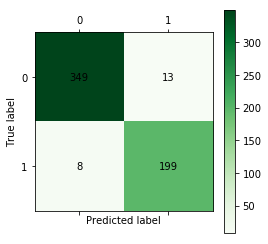

In [105]:
import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt
cm_plot(y_train,yp).show() #显示混淆矩阵可视化结果

## 评价分类器的指标
    前面几次的交叉验证，我们都利用scikit-learn里的accuracy指标来评价分类器在测试集上的性能。
    
    但是accuracy作为分类器评价指标存在一定局限性，假如我们面临一个二分类问题，测试数据集A（size=100）里有90个样例分类标签是0，还有10个实际分类标签是1。我们构建一个不借助任何机器学习算法的分类器（暂取名zero classifier），无论什么测试数据，zero classifier一直预测分类标签是0。这样的分类器在前述测试数据集A上的表现如何？它也可以达到90%的准确率，与前面人工神经网络的预测水平相当，这说明accuracy在面对比较skewed的数据集时作分类器的评价指标会存在问题。

    其实机器学习领域并非只有accuracy一个评价指标，常用其他指标还有confusion matrix，precision，recall，F1-score，ROC curve等，通过乳腺肿瘤的数据集，我们来对这些指标逐一解读。

### 一、confusion matrix （混淆矩阵）
    首先看confusion matrix，中文翻译为混淆矩阵,sklearn里的函数confusion_matrix可以为我们返回混淆矩阵。混淆矩阵的大小为n*n，n表示所有类别的数量，每行表示实际类别数量，每列表示预测出来的类别数量，通过矩阵的形式可以看到分类器在每个类别的预测成绩。

    还是以二分类（0，1）问题举例，下面这个混淆矩阵的解读方法：实际分类为0的数据有50个，其中分类器正确预测了其中48个，把2个错分到类别1，实际分类为1的数据是58个，分类器正确预测了51个，把7个错分到了0类别。在混淆矩阵中，我们希望主对角线（左上至右下）上的数字越大好，副对角线（左下到右上）上的数字越小越好。 
       48    2
       7     51
    利用confusion_matrix看看前面几个分类器表现

In [126]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
cut=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for a,b in cut.split(X=pred_features,y=diagnosis):
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    
'''
逻辑回归

''' 
from sklearn.linear_model import LogisticRegression
logClf=LogisticRegression()
test_pred=logClf.fit(train_x,train_y).predict(test_x)
print('confusion matrix for logistical classifier is:')
print(confusion_matrix(test_y,test_pred))

'''
支持向量机

'''
from sklearn.svm import SVC
svmClf=SVC(kernel='linear',C=1)
test_pred_svm=svmClf.fit(train_x,train_y).predict(test_x)
print('confusion matrix for SVM classifier is:')
print(confusion_matrix(test_y,test_pred_svm))

'''
随机森林

'''

from sklearn.ensemble import RandomForestClassifier
rfClf=RandomForestClassifier()
test_prediction_rf=rfClf.fit(train_x,train_y).predict(test_x)
print('confusion matrix for randomForest classifier is:')
print(confusion_matrix(test_y,test_prediction_rf))


'''
神经网络

'''

from sklearn.neural_network import MLPClassifier
MLPclf=MLPClassifier(activation="relu",batch_size=80,
                  hidden_layer_sizes=(30,30,30,15,55,15,15,30),
                  max_iter=2000,random_state=42,learning_rate_init=0.001)
test_prediction_MLP=MLPclf.fit(train_x,train_y).predict(test_x)
print('confusion matrix for MLP classifier is:')
print(confusion_matrix(test_y,test_prediction_MLP))

confusion matrix for logistical classifier is:
[[71  1]
 [ 6 36]]
confusion matrix for SVM classifier is:
[[70  2]
 [ 7 35]]
confusion matrix for randomForest classifier is:
[[71  1]
 [ 6 36]]
confusion matrix for MLP classifier is:
[[70  2]
 [ 6 36]]


## precision ，recall and F1-score.
    https://www.zhihu.com/question/30643044
    precision 表示精准程度，在分类器预测的阳性中，有多大比例是真阳性，recall表示灵敏程度，即分类器能将所有真阳性中多大比例的样本预测出来，一般来讲，两者之间存在一个折衷，精准度非常高，那灵敏度就相对不那么高，反之亦然。而从F1_score的计算公式来看，它把两个指标综合起来，要precision和recall都相对较高时，才能得到一个较高的F1_score.

In [129]:
from sklearn.metrics import precision_score,recall_score,f1_score

## 注意这里要把label标签转换成0，1变量而非字符串

print("precision for SVM is %.2f" % (precision_score(test_y=='M',test_pred_svm=="M")))
print("recall for SVM is %.2f" %(recall_score(test_y=='M',test_pred_svm=="M")))

print("F1_score for SVM is %.2f" %(f1_score(test_y=='M',test_pred_svm=="M")))
print("F1_score for randomforest is %0.2f" %(f1_score(test_y=='M',test_prediction_rf=="M")))
print("F1_score for logisticRegression is %.2f" %(f1_score(test_y=='M',test_pred=="M")))
print("F1_score for MLP is %.2f" %(f1_score(test_y=='M',test_prediction_MLP=="M")))

precision for SVM is 0.95
recall for SVM is 0.83
F1_score for SVM is 0.89
F1_score for randomforest is 0.91
F1_score for logisticRegression is 0.91
F1_score for MLP is 0.90


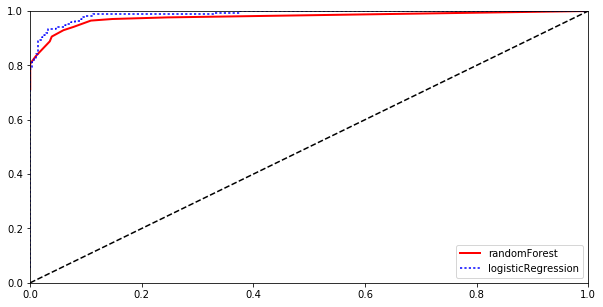

In [130]:
from sklearn.metrics import roc_curve
y_scores=cross_val_predict(rfClf,train_x,train_y,cv=3,method="predict_proba")
y_scores_logit=cross_val_predict(logClf,train_x,train_y,cv=3,method="predict_proba")

y_scores_rf = y_scores[:, 1]
y_scores_log=y_scores_logit[:, 1]
fpr_log,tpr_log,t_log=roc_curve(train_y=='M',y_scores_log)

fpr,tpr,thres=roc_curve(train_y=='M',y_scores_rf)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,linewidth=2,c="r",label="randomForest")
plt.plot(fpr_log,tpr_log,"b:",label="logisticRegression")
plt.plot([0,1],[0,1],"k--")
plt.axis([0,1,0,1])
plt.legend(loc="lower right")
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score
print('the AUC for logisticRegression is %.4f'%(roc_auc_score(train_y=="M", y_scores_log)))
print('the AUC for randomForest is %.4f'%(roc_auc_score(train_y=="M", y_scores_rf)))

the AUC for logisticRegression is 0.9893
the AUC for randomForest is 0.9773


## 调参 
参数搜索的方法对前面几种分类器模型参数进行调整，以提升分类器的类别预测效果。

    一 、SVM支持向量机

        在支持向量机函数中，kernal可以选择’linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’，如果kernal选择为rbf、poly、 sigmoid，超参数gamma也可以调整。


    二、Logistic回归分类器

        logistic regression里面可以调整的超参数有：

        penalty：正则惩罚项：使用L1还是L2惩罚项，默认一般是L2.

        C : 正则化程度的倒数，C越小，正则化程度越强

        solver：优化算法选择，有四个：newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’， 默认采取是liblinear的优化算法，该方法对规模小的数据集效果较好，数据集规模较大的时候sag的速度更快. 面对多分类变量问题的时候，只有 ‘newton-cg’, ‘sag’ 和’lbfgs’能处理多分类变量损失函数，‘liblinear’ 只能处理两分类（是或者否）. ‘newton-cg’, ‘lbfgs’ 和 ‘sag’ 只支持L2惩罚项。

    三、Random Forest 随机森林

        在Random Forest 模型中，常见可调参数有 ：
        n_estimators : 随机森林中树的数量，也就是弱分类器的数量
        criterion: 两种衡量分割效果的方法，有基尼系数法和熵法。
        max_features : 寻找最佳分割时要考虑特征变量的个数
        max_depth ：设置决策树最大深度，如果不设置该变量，决策树一直延伸直至每个叶节点都完美分类，或者所有叶节点内数量达到min_samples_split指定的样本数量。
        min_samples_split: 分割一个内部节点所要求的最低样本含量，低于这个数量就不再分割了。
        max_leaf_nodes :  叶节点最大数目，默认不限制叶节点的最大数量。
        min_impurity_split: 如果纯度还高于阈值，继续分割，如果达到阈值，成为叶节点。
        bootstrap : 在生长树的时候是否采用bootstrap的方法

    四、最佳参数搜索
        主要是两种原理，一种是Grid search（网格式搜索），把可调参数排列组合，比如模型有两个参数A和B，参数A有3个取值，参数B有2个取值，组合起来就是6种，用这6种取值去拟合数据后得到6个模型，利用交叉验证和评价指标来筛选最佳参数组合。第二种看函数名就可以猜到，是根据各参数的分布范围随机抽样后组合，同样利用交叉验证和评价指标来筛选最佳参数组合。

## 网络搜索调参

In [16]:
from sklearn.ensemble import RandomForestClassifier
#建立一个随机森林分类器
cfClf=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

##设置参数网格，随机森林默认的bootstrap是True，第一个网格只涉及两个参
##数：树的数量和特征变量个数，前者有三个值可以选择，后者有四个值可
##选，有12种组合，后面一个dict格式储存的是另一种网格，在bootstrap参数设
##置为False的情况下，树的数量有两个值可选，max_feature有三个值可选，
##共有6种组合，加上前面12种就是18种组合。
hypermeter_grid=[{'n_estimators':[3,10,15],
                'max_features':[2,4,6,8]},                 
                 {'bootstrap':[False],
                 'n_estimators':[3,10],
                 'max_features':[2,3,4]}]           

##设置三折交叉验证，评价指标选F1
grid_search=GridSearchCV(cfClf,hypermeter_grid,cv=3,scoring='f1')

#利用不同的参数组合去拟合数据 ，建立模型
grid_search.fit(pred_features,diagnosis=='M')

'''
查看最佳的参数设置和各种组合得分情况
得分最高的就是最佳参数选择


'''
grid_search.best_params_,grid_search.grid_scores_

C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


({'bootstrap': False, 'max_features': 4, 'n_estimators': 10},
 [mean: 0.90083, std: 0.02264, params: {'max_features': 2, 'n_estimators': 3},
  mean: 0.92477, std: 0.03509, params: {'max_features': 2, 'n_estimators': 10},
  mean: 0.93784, std: 0.00874, params: {'max_features': 2, 'n_estimators': 15},
  mean: 0.92059, std: 0.02336, params: {'max_features': 4, 'n_estimators': 3},
  mean: 0.92219, std: 0.02102, params: {'max_features': 4, 'n_estimators': 10},
  mean: 0.93324, std: 0.01518, params: {'max_features': 4, 'n_estimators': 15},
  mean: 0.91311, std: 0.02766, params: {'max_features': 6, 'n_estimators': 3},
  mean: 0.93746, std: 0.01815, params: {'max_features': 6, 'n_estimators': 10},
  mean: 0.94133, std: 0.02955, params: {'max_features': 6, 'n_estimators': 15},
  mean: 0.93374, std: 0.01944, params: {'max_features': 8, 'n_estimators': 3},
  mean: 0.93158, std: 0.03058, params: {'max_features': 8, 'n_estimators': 10},
  mean: 0.93180, std: 0.03157, params: {'max_features': 8, 'n_

## 随机搜索调参

In [23]:
'''
调用scipy里面的整数随机分布

'''
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

'''
将max_features,min_samples_split,以及min_samples_leaf的随机分布设置好，
注意这里不能用np.random.randomint函数，这里要求的是分布不是抽样结果

'''
random_grid={"max_depth": [3, None], 
              "max_features": sp_randint(1, 20),  
              "min_samples_split":sp_randint(2, 11), 
              "min_samples_leaf": sp_randint(1, 11),  
              "bootstrap": [True, False], 
              "criterion": ["gini", "entropy"]}

#随机抽取10次参数组合
n_iteration=10

#设置三次交叉验证，评价分数为F1
random_grid_search=RandomizedSearchCV(cv=3,estimator=cfClf,n_iter=n_iteration,scoring='f1',param_distributions=random_grid)

#拟合数据
random_grid_search.fit(pred_features,diagnosis=='M')

## 查看最佳F1得分
random_grid_search.best_score_ 
## 查看最佳参数组合
random_grid_search.best_params_
## 查看10次参数组合的得分情况
random_grid_search.grid_scores_

C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93376, std: 0.02735, params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 5},
 mean: 0.91328, std: 0.02864, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 4},
 mean: 0.92819, std: 0.03303, params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 8},
 mean: 0.90004, std: 0.03000, params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 19, 'min_samples_leaf': 10, 'min_samples_split': 2},
 mean: 0.91638, std: 0.01274, params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 12, 'min_samples_leaf': 6, 'min_samples_split': 9},
 mean: 0.93547, std: 0.01991, params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 3},
 mean: 0

## 集成学习

### 把分类算法集成起来，构建出一个效果更好的综合分类器。

        机器学习称这种把机器学习模型集成起来的方法为ensemble learning（集成学习）。集成学习的原理很容易理解，非常intuitiv，就是把不同的机器学习模型组合起来，发挥各自的优势，扬长避短。集成学习有下面几个优势：

        预测效果好，集成学习多数情况下优于单一模型的预测效果。在诸如kaggle这样的机器学习模型竞赛中，名列前茅的选手们往往无一例外使用ensemble learning的方法来提升模型的最终预测效果。

        部分集成学习可以并列实现，在不同的cpu上跑不同的模型，然后将这些模型再集成起来

        组合方法简单灵活，可以组合不同类型的机器学习模型，也可以组合同一类型的随机机器学习模型（典型案例就是决策树模型组合为随机森林），可以自己设定集成的规则。

        集成各个学习器的结果主要是通过voting（投票）的方式。例如面对一个二分类问题（0和1）的时候，logistic回归给出一个分类结果1，svm预测的结果是0，朴素贝叶斯预测出来的是1，人工神经网络给出的是1，那么按照少数服从多数的原则，集成分类的预测结果就是1. 这在机器学习中称为hard voting 硬投票方式，还有soft voting 软投票方式，就是依据分类器给出的概率平均值结果来投票，比如A分类器预测的概率是{0：0.53，1:0.47}，B分类器预测出的概率是{0:0.36,1:0.64}，那分类为0的概率均值为（0.53+0.36）/2=0.445, 分类为1的概率为（0.47+0.64）/2=0.555，所以最终预测结果为分类1，当然soft voting仅限于那些能够给出分类概率的学习器。另外还可以给每个学习器设置不同权重，给效果较好的学习器赋予较大的权重，使其预测结果在最终决策中发挥作用更大。

### 集成学习的两种主要形式：bagging and boosting

        bagging就是反复有放回（或无放回）在样本数据集中随机抽出子样本作为训练集，不断从这些子样本训练出模型，然后把所有模型结果集成。bagging不仅 可以抽取数据样例（instance），也可以随机抽取特征（feature）。 总之可以理解为在样本空间里不断提取亚空间出来做训练集不断训练模型，最后把众多个模型集成起来。前面文章里用到的Random Forest随机森林就是bagging的典型代表。

        boosting也是把弱学习器集成为强学习器，和bagging的不同之处在于，大部分boosting方法强调有先后顺序的进行模型训练，从前一个学习器所犯的错误中学习，吃一堑长一智，不断迭代循环改进下一个学习器。然后再把所有的学习器按照一定的规则再集成其预测结果。boosting的两大主力分别为adaboosting和Gradient boosting。

        AdaBoosting的算法思想是给学习器和训练集的个案都赋予权重，表现越好的学习器权重越高，越难被预测准确的训练数据个案权重越高，越受重视。AdaBoosting的实现细节是：先给每个训练样本个案赋予权重（初始权重一般都是平等的），第一个学习器训练出来以后，会预测错一部分样本个案，根据预测错的比例以及个案权重来给该学习器本身计算一个权重，同时更新被分错训练集个案的权重（强调所犯错误），然后进行第二次训练，依照第二个学习器错误预测的情况和新个案权重再计算第二个学习器的权重，并再次更新个案的权重，如此依次迭代下去，直至学习器的数量达到预先指定的数量，或是迭代到一个非常完美的学习器。最后在做预测时，通过每个分类器的预测结果及分类器的权重对预测结果进行集成，得到最终的预测结果。

        Gradient boosting同样也是关注上一个学习器所犯的错误，但是其方式不同于AdaBoosting。Gradient boosting是先训练一个学习器，然后计算这个学习器预测结果和实际值之间的残差e1，然后训练第二个学习器，第二个学习器的训练方法变了，不是去拟合原始数据y，而是去拟合e1，第二个学习器构建好以后，再次计算它的残差e2, 得到e2以后，就可以构建第三个学习器去拟合e2,将这个过程持续迭代，最后在预测时，把这些学习器的预测结果相加，就得到了最终预测结果。

In [42]:
'''
##向量机，朴素贝叶斯，多层感知器，随机森林，

'''

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

'''
分割训练集和测试集数据，在测试集上计算每个分类学习算法的混淆矩阵

'''

cut=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)

for a,b in cut.split(X=pred_features,y=diagnosis):
    train_x,train_y=pred_features.iloc[a,:],diagnosis[a]
    test_x,test_y=pred_features.iloc[b,:],diagnosis[b]
    
    
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression  #逻辑回归分类器
from sklearn.svm import SVC  #支持向量机分类器
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.neural_network import MLPClassifier#多层感知机
from sklearn.naive_bayes import GaussianNB#朴素贝叶斯



'''
逻辑回归

'''
logClf=LogisticRegression()
test_pred_log=logClf.fit(train_x,train_y).predict(test_x)
print("逻辑回归的混淆矩阵：")
print(confusion_matrix(test_y,test_pred_log))

'''

支持向量机

'''
svmClf=SVC(kernel='linear',C=1,random_state=42)
test_pred_svm=svmClf.fit(train_x,train_y).predict(test_x)
print("支持向量机的混淆矩阵：")
print(confusion_matrix(test_y,test_pred_svm))


'''
随机森林

'''
rfClf=RandomForestClassifier()
test_pred_rf=rfClf.fit(train_x,train_y).predict(test_x)
print("随机森林的混淆矩阵：")
print(confusion_matrix(test_y,test_pred_rf))

'''
多层感知机

'''
MLPclf=MLPClassifier(activation="relu",batch_size=80,hidden_layer_sizes=(30,20,20,15),max_iter=4000,random_state=42,learning_rate_init=0.001)
test__pred_MLP=MLPclf.fit(train_x,train_y).predict(test_x)
print("多层感知机的混淆矩阵：")
print(confusion_matrix(test_y,test__pred_MLP))

'''

朴素贝叶斯

'''
nbClf=GaussianNB()
test_pred_nb=nbClf.fit(train_x,train_y).predict(test_x)
print("朴素贝叶斯的混淆矩阵：")
print(confusion_matrix(test_y,test_pred_nb))


逻辑回归的混淆矩阵：
[[71  1]
 [ 6 36]]
支持向量机的混淆矩阵：
[[70  2]
 [ 7 35]]
随机森林的混淆矩阵：
[[72  0]
 [ 3 39]]
多层感知机的混淆矩阵：
[[71  1]
 [12 30]]
朴素贝叶斯的混淆矩阵：
[[72  0]
 [ 7 35]]


In [44]:
'''
集成学习

'''
from sklearn.ensemble import VotingClassifier
vot=VotingClassifier(estimators=[('logistic',logClf),("svm",svmClf),("rf",rfClf),("nb",nbClf),("nn",MLPclf)],voting="hard")
votClf=vot.fit(train_x,train_y)
vot_pred=votClf.predict(test_x)
print("集成学习的混淆矩阵是：")
print(confusion_matrix(test_y,vot_pred))
from sklearn.metrics import f1_score
print(f1_score(test_y=="M",vot_pred=="M"))

集成学习的混淆矩阵是：
[[72  0]
 [ 5 37]]
0.936708860759
